<a href="https://colab.research.google.com/github/Danish2331/ML-Fraud-Detection/blob/main/ML___Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Importing all the necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

#Loading the Data

In [ ]:
data = pd.read_csv("/content/creditcard.csv")

#Understanding the Data

In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#Describing the Data

In [ ]:
print(data.shape)
print(data.describe())

(284807, 31)
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271

#Imbalance in the data

In [ ]:
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]
outlierFraction = len(fraud)/float(len(valid))
print(outlierFraction)
print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))

0.0017304750013189597
Fraud Cases: 492
Valid Transactions: 284315


#Print the amount details for Fraudulent Transaction

In [ ]:
print("Amount details of the fraudulent transaction")
fraud.Amount.describe()

Amount details of the fraudulent transaction


,Amount
count,492.000000
mean,122.211321
std,256.683288
min,0.000000
25%,1.000000
50%,9.250000
75%,105.890000
max,2125.870000


# Print the amount details for Normal Transaction

In [ ]:
print("details of valid transaction")
valid.Amount.describe()

details of valid transaction


,Amount
count,284315.000000
mean,88.291022
std,250.105092
min,0.000000
25%,5.650000
50%,22.000000
75%,77.050000
max,25691.160000


#Plotting the Correlation Matrix

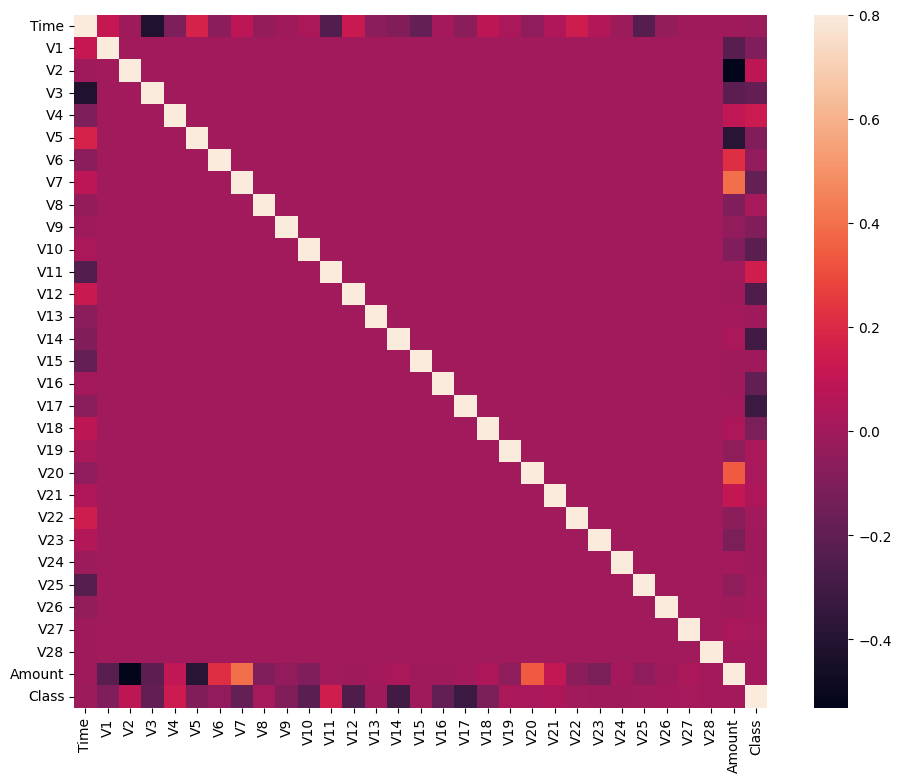

In [ ]:
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

#Separating the X and the Y values

In [ ]:
# dividing the X and the Y from the dataset
X = data.drop(['Class'], axis = 1)
Y = data["Class"]
print(X.shape)
print(Y.shape)
# getting just the values for the sake of processing
# (its a numpy array with no columns)
xData = X.values
yData = Y.values

(284807, 30)
(284807,)


#Training and Testing Data Bifurcation

In [ ]:
# Using Scikit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
xTrain, xTest, yTrain, yTest = train_test_split(
        xData, yData, test_size = 0.2, random_state = 42)


#Building a Random Forest Model using scikit learn

In [ ]:
# Building the Random Forest Classifier (RANDOM FOREST)
from sklearn.ensemble import RandomForestClassifier
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(xTrain, yTrain)
# predictions
yPred = rfc.predict(xTest)

# Building all kinds of evaluating parameters

In [ ]:
# Evaluating the classifier
# printing every score of the classifier
# scoring in anything
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix

n_outliers = len(fraud)
n_errors = (yPred != yTest).sum()
print("The model used is Random Forest classifier")

acc = accuracy_score(yTest, yPred)
print("The accuracy is {}".format(acc))

prec = precision_score(yTest, yPred)
print("The precision is {}".format(prec))

rec = recall_score(yTest, yPred)
print("The recall is {}".format(rec))

f1 = f1_score(yTest, yPred)
print("The F1-Score is {}".format(f1))

MCC = matthews_corrcoef(yTest, yPred)
print("The Matthews correlation coefficient is{}".format(MCC))

The model used is Random Forest classifier
The accuracy is 0.9995962220427653
The precision is 0.9746835443037974
The recall is 0.7857142857142857
The F1-Score is 0.8700564971751412
The Matthews correlation coefficient is0.8749276812909632


#Visualizing the Confusion Matrix

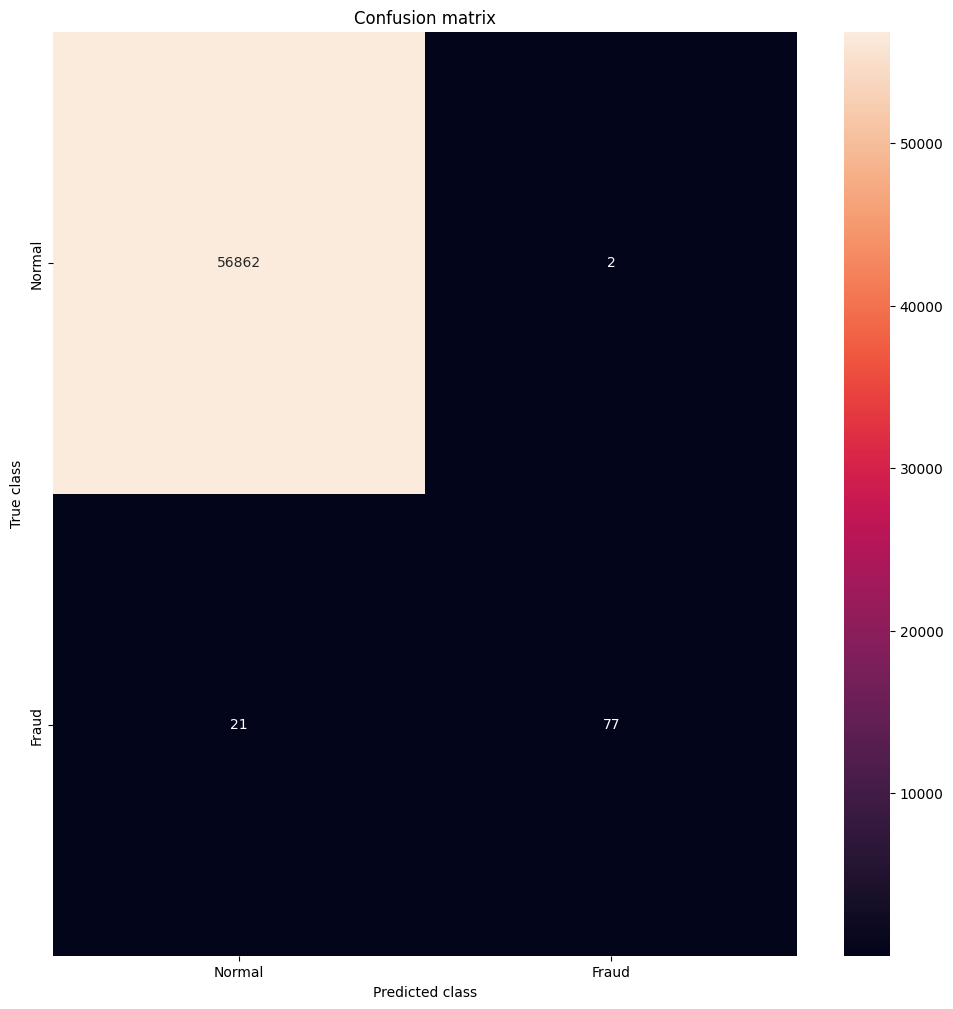

In [ ]:
# printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(yTest, yPred)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS,
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

#Saving RandomForest Model


In [ ]:
import joblib
joblib.dump(rfc, 'random_forest_fraud_model.pkl')

['random_forest_fraud_model.pkl']

#Downloading the saved model

In [ ]:
from google.colab import files
files.download('random_forest_fraud_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Building a Logistic Regression Model using scikit learn

In [ ]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=30000)
log_model.fit(xTrain, yTrain)

yPred_log = log_model.predict(xTest)

#Building Evaluation Parameters and Plotting Confusion Matrix

Accuracy: 0.9991046662687406
Precision: 0.8615384615384616
Recall: 0.5714285714285714
F1 Score: 0.6871165644171779


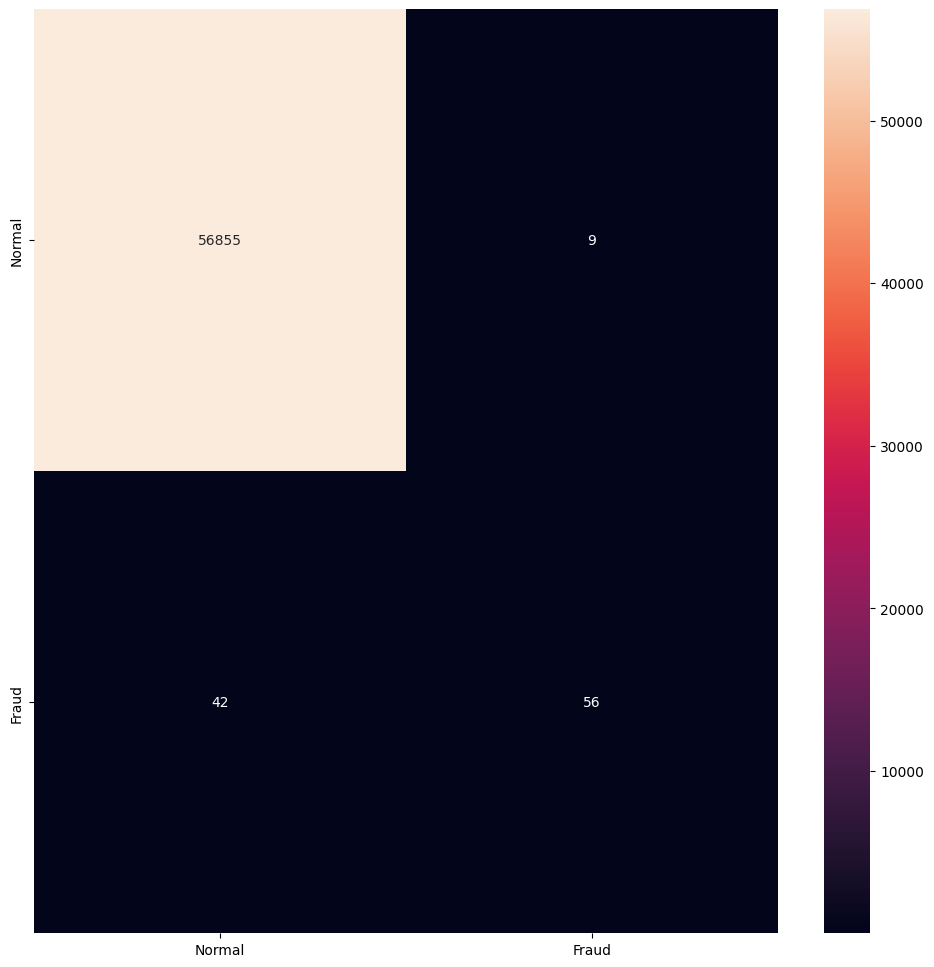

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

print("Accuracy:", accuracy_score(yTest, yPred_log))
print("Precision:", precision_score(yTest, yPred_log))
print("Recall:", recall_score(yTest, yPred_log))
print("F1 Score:", f1_score(yTest, yPred_log))

conf_matrix = confusion_matrix(yTest, yPred_log)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, annot=True, fmt="d", xticklabels=LABELS, yticklabels=LABELS)
plt.show()

#Saving the Logistic Regression Model

In [ ]:
import joblib
joblib.dump(log_model, 'logistic_regression_model.pkl')

['logistic_regression_model.pkl']

#Downloading the model

In [ ]:
from google.colab import files
files.download('logistic_regression_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Sample Prediction using Random Forest Model

In [ ]:
sample_rf = xTest[6743].reshape(1, -1)

prediction_rf = rfc.predict(sample_rf)

print("Prediction:", "Fraud" if prediction_rf[0] == 1 else "Normal")

Prediction: Normal


#Sample Prediction using Logistic Regression model

In [ ]:
sample = xTest[756].reshape(1, -1)

prediction = log_model.predict(sample)

print("Prediction:", "Fraud" if prediction[0] == 1 else "Normal")


Prediction: Normal


#Normalized Distribution Graph Plot

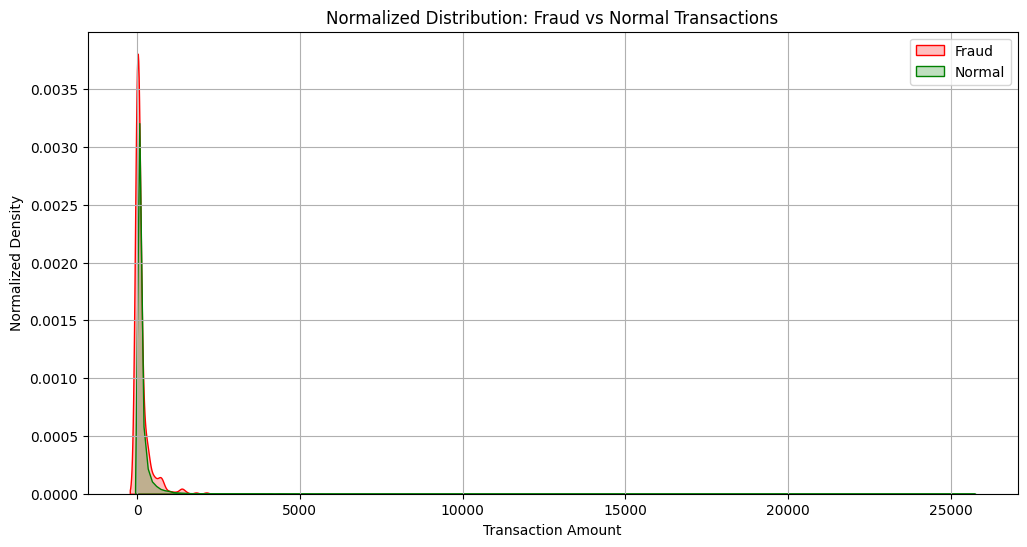

In [ ]:
plt.figure(figsize=(12, 6))
sns.kdeplot(fraud['Amount'], color='red', label='Fraud', fill=True)
sns.kdeplot(valid['Amount'], color='green', label='Normal', fill=True)
plt.legend()
plt.xlabel("Transaction Amount")
plt.ylabel("Normalized Density")
plt.title("Normalized Distribution: Fraud vs Normal Transactions")
plt.grid(True)
plt.show()